# T1

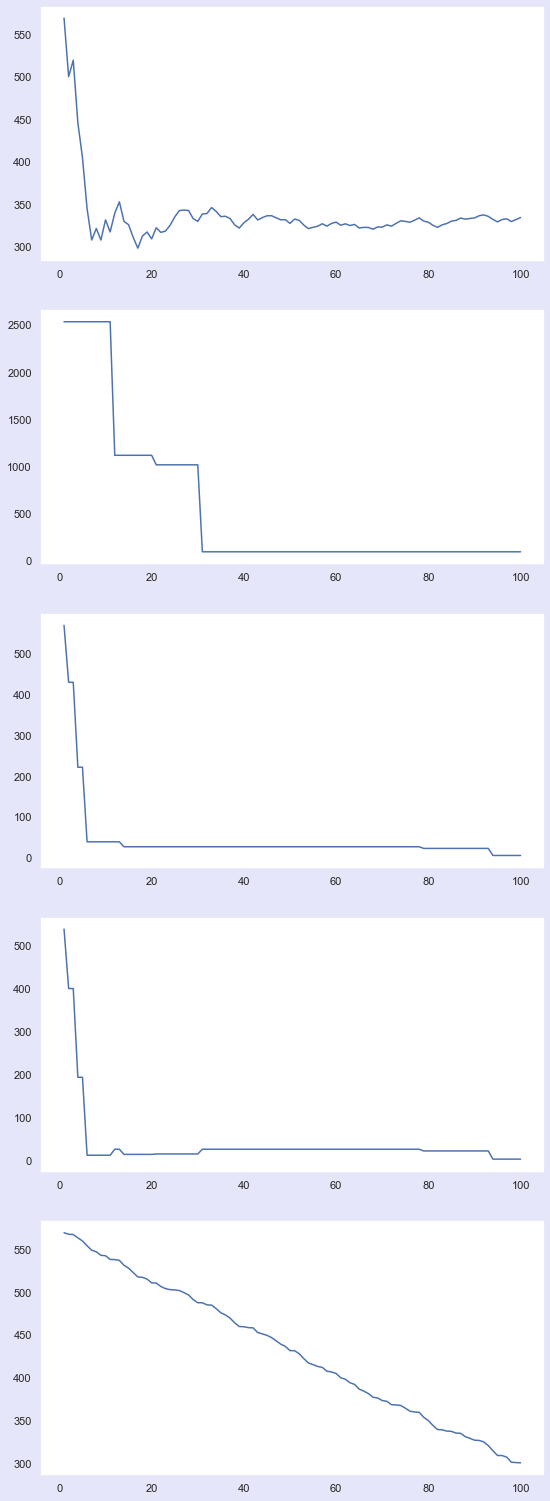

In [127]:
import numpy as np
import matplotlib.pyplot as plt
theta = 600
sample = np.random.randint(0, theta, 100)
res = {"th1": [], "th2": [], "th3": [], "th4": [], "th5": []}

def f1(array):
    return np.mean(array)

def f2(array):
    return 101*np.min(array)

def f3(array):
    return 1.01*np.max(array)

def f4(array):
    return np.min(array) + np.max(array)

def f5(array):
    return array[0] + np.sum(array[1:])/(99)

for i in range(1, 101):
    res["th1"].append(np.abs(f1(sample[:i]) - theta))
    res["th2"].append(np.abs(f2(sample[:i]) - theta))
    res["th3"].append(np.abs(f3(sample[:i]) - theta))
    res["th4"].append(np.abs(f4(sample[:i]) - theta))
    res["th5"].append(np.abs(f5(sample[:i]) - theta))
    
fig, ax = plt.subplots(5, figsize=(9, 27))

for i in "th1", "th2", "th3", "th4", "th5":
    ax[int(i[-1])-1].plot(range(1, 101), res[i])

# T2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import random
import seaborn as sns

n = 25
x = np.sort(np.array([random.expovariate(lambd = 1) for _ in range(n)]))

## a)

### Мода

In [2]:
sps.mode(x).mode[0]

0.17931588172813595

### Медиана

In [3]:
np.median(x)

0.7375142787098019

### Размах

In [4]:
x[-1] - x[0]

4.109110894400702

### Коэффициент асимметрии

In [5]:
sps.skew(x, axis=0, bias=False)

2.145096778407824

## b)

### Эмпирическая функция распределения

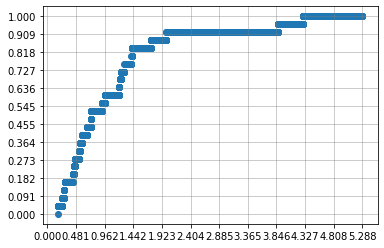

In [6]:
x_line = np.linspace(x[0], x[n-1]+1, 10000)
y = np.array([np.sum(x<i) for i in x_line])/len(x)
fig, ax = plt.subplots()
ax.scatter(x_line, y)
ax.set_xticks(np.linspace(0, x_line.max(), 12))
ax.set_yticks(np.linspace(0, y.max(), 12))
ax.grid(which='major', alpha = 0.5, color='gray') 

### Гистограмма

(array([15.,  7.,  1.,  0.,  2.]),
 array([0.17931588, 1.00113806, 1.82296024, 2.64478242, 3.4666046 ,
        4.28842678]),
 <BarContainer object of 5 artists>)

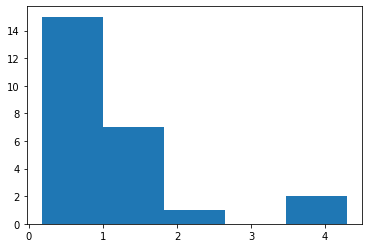

In [9]:
k = 1 + np.log2(n)
fig, ax = plt.subplots()
plt.hist(x, bins = int(k))

### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9da47fac40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9da48070d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9da47fa970>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9da48076a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9da4807970>],
 'means': []}

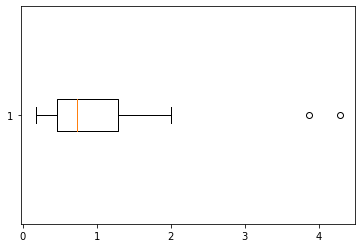

In [12]:
fig, ax = plt.subplots()
plt.boxplot(x, vert=False)

## с)

In [15]:
s = np.sqrt(1/(n-1)*np.sum((x-x.mean())**2))
h = 2.344*s/(n**0.2)

def q_func(x, h, x0):
    return 3/4*(1-((x-x0)/h)**2)

values = np.linspace(x[0] - h, x[-1] + h, 10000)
y = np.zeros_like(values)
for i in range(len(x)-1):
    a1 = x[i] - h
    b1 = x[i] + h 
    ind_a = np.where(values >= a1)[0][0]
    ind_b = np.where(values <= b1)[0][-1]
    y[ind_a:ind_b] += q_func(values[ind_a : ind_b], h, x[i])

### Ядерная оценка плотности

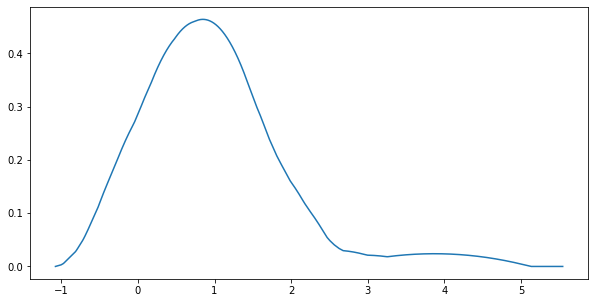

In [16]:
fig, ax = plt.subplots(figsize = (10,5))
plt.plot(values,y/(n*h))

## d)

### Бутстраповская оценка

/var/folders/gv/c118vm9j4ndfhcj_8_jfnw1h0000gn/T/ipykernel_99042/747820755.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<AxesSubplot:ylabel='Density'>

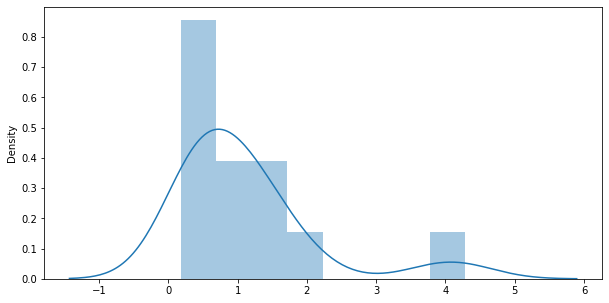

In [17]:
fig, ax = plt.subplots(figsize = (10,5))
sns.distplot(x)

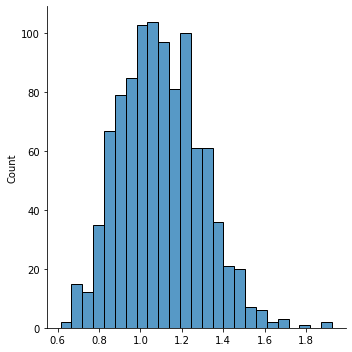

In [24]:
means = [np.random.choice(x, size=n, replace=True).mean() for _ in range(1000)]
sns.displot(means, bins = n)

## e)

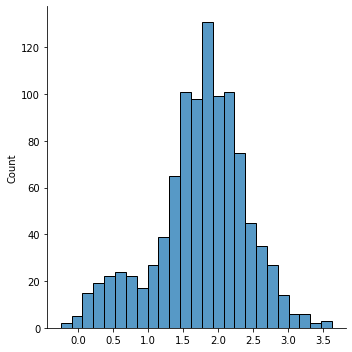

In [26]:
asym = [sps.skew(np.random.choice(x, size=n, replace=True)) for _ in range(1000)]
sns.displot(asym, bins = n)